In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense
import tensorflow as tf
import numpy as np
import cv2
import os

from tensorflow.keras.layers import Conv2D, Flatten,Dense,MaxPool2D,BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Model

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/DatasetTT


/content/gdrive/MyDrive/DatasetTT


In [ ]:
os.chdir(os.getcwd()+'/train/benign')


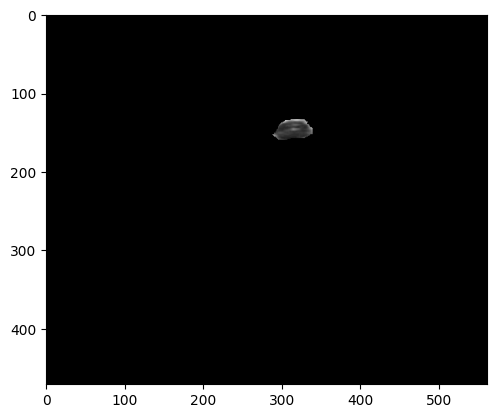

In [ ]:
os.getcwd()
x = cv2.imread('benign_1.png')
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
plt.imshow(x)

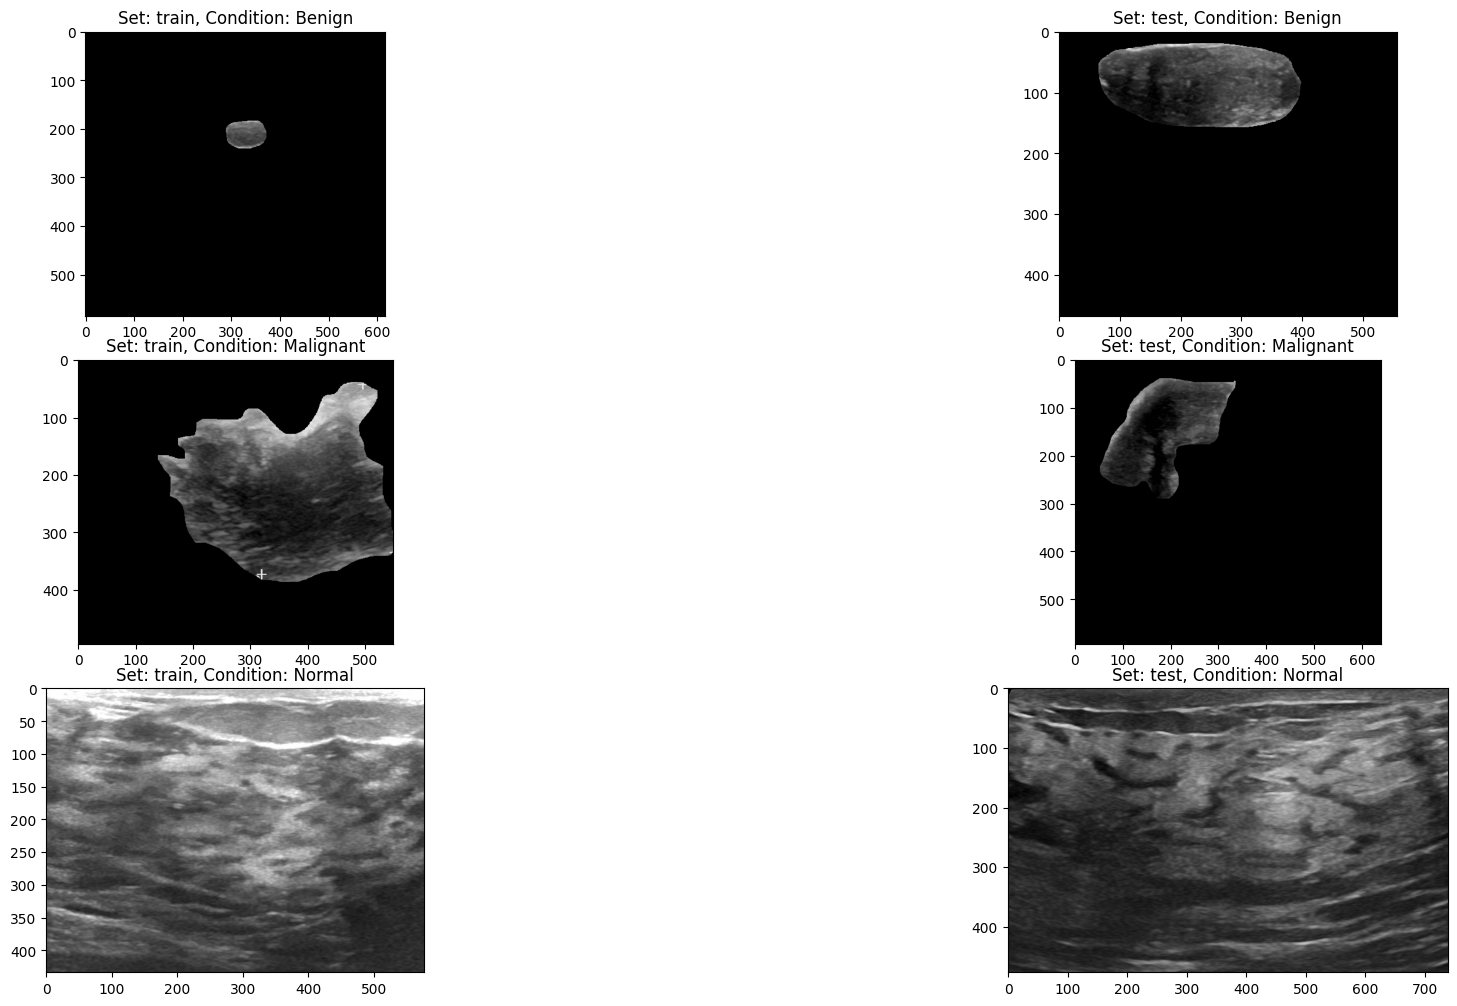

In [ ]:
input_path = '/content/gdrive/MyDrive/DatasetTT/'

fig, ax = plt.subplots(3, 2, figsize=(20, 10))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/benign/'+os.listdir(set_path+'/benign')[6]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Benign'.format(_set))
    ax[i+2].imshow(plt.imread(set_path+'/malignant/'+os.listdir(set_path+'/malignant')[4]), cmap='gray')
    ax[i+2].set_title('Set: {}, Condition: Malignant'.format(_set))
    ax[i+4].imshow(plt.imread(set_path+'/normal/'+os.listdir(set_path+'/normal')[4]), cmap='gray')
    ax[i+4].set_title('Set: {}, Condition: Normal'.format(_set))

In [ ]:
train = ImageDataGenerator(rescale=1./255, zoom_range=0.3, vertical_flip=True)
validation = ImageDataGenerator(rescale=1./255, zoom_range=0.3, vertical_flip=True)
os.getcwd()

'/content/gdrive/MyDrive/DatasetTT/train/benign'

In [ ]:
train_x = train.flow_from_directory('/content/gdrive/MyDrive/DatasetTT/train/',
                                 target_size=(200,200),
                                 batch_size=64,
                                 class_mode = 'categorical')
print(train_x.samples)

train_no= train_x.samples
print(train_x.class_mode)

Found 623 images belonging to 3 classes.
623
categorical


In [ ]:
validation_x = validation.flow_from_directory('/content/gdrive/MyDrive/DatasetTT/test/',
                                 target_size=(200,200),
                                 batch_size=64,
                                 class_mode='categorical')
print(validation_x.samples)
test_no=validation_x.samples

Found 157 images belonging to 3 classes.
157


In [ ]:
base_model = VGG16(include_top= False , weights= 'imagenet')
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x=GlobalAveragePooling2D()(x)
predictions = Dense(3,activation = 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

opt = tf.keras.optimizers.Adam(
    learning_rate=0.01)

model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

model=model.fit(train_x,
         steps_per_epoch=8,
         epochs=10,
         validation_data=validation_x)


#model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
8/8 [==============================] - 236s 30s/step - loss: 0.9416 - accuracy: 0.5414 - val_loss: 0.7375 - val_accuracy: 0.6242
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 0.5462 - accuracy: 0.8121 - val_loss: 0.5244 - val_accuracy: 0.8599
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.3588 - accuracy: 0.9253 - val_loss: 0.3981 - val_accuracy: 0.8662
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 0.2815 - accuracy: 0.9293 - val_loss: 0.4033 - val_accuracy: 0.8790
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 0.2440 - accuracy: 0.9394 - val_loss: 0.3232 - val_accuracy: 0.8726
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.2068 - accuracy: 0.9453 - val_loss: 0.3036 - val_accuracy: 0.9045
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.1827 - accuracy: 0.9455 - val_los

In [ ]:
input_path= '/content/gdrive/MyDrive/datasetFL/'

def make_clients(number_of_clients):
    clients = []
    for i in range(1,number_of_clients+1):
        c= "client_{}".format(i)
        clients.append(c)
    return clients
clients = make_clients(2)
print(clients)

['client_1', 'client_2']


In [ ]:
os.getcwd()

'/content/gdrive/MyDrive/DatasetTT/train/benign'

In [ ]:
def make_dataset_clients(client_name):
    client_number = client_name[-1]

    #Loading Dataset
    input_path= '/content/gdrive/MyDrive/datasetFL/{}'.format(client_number)

    train = train = ImageDataGenerator(rescale=1./255, zoom_range=0.3, vertical_flip=True)
    validation = ImageDataGenerator(rescale=1./255, zoom_range=0.3, vertical_flip=True)

    train_x = train.flow_from_directory(input_path+'/train',
                                 target_size=(200,200),
                                 batch_size=16,
                                 class_mode='categorical')


    validation_x = validation.flow_from_directory(input_path+'/test',
                                 target_size=(200,200),
                                 batch_size=16,
                                 class_mode='categorical')

    return train_x,validation_x

In [ ]:
class MLP:
    @staticmethod
    def build():

        base_model = VGG16(include_top= False , weights= 'imagenet')
        for layer in base_model.layers:
            layer.trainable = False
        x = base_model.output
        x=GlobalAveragePooling2D()(x)
        predictions = Dense(3,activation = 'softmax')(x)
        model = Model(inputs = base_model.input, outputs = predictions)
        return model

In [ ]:
global_mlp = MLP()
global_model=global_mlp.build()
opt = tf.keras.optimizers.Adam(
    learning_rate=0.01)
global_model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

In [ ]:
def scale_weight(model_weights,scaling_factor):
    scaled_weight = []
    steps = len(model_weights)
    for i in range(steps):
        weight = model_weights[i]*scaling_factor
        scaled_weight.append(weight)
    return scaled_weight

In [ ]:
def sum_scaled_weights(scaled_weight_list):
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)

    return avg_grad

In [ ]:
%%time
comm_round = 1
accuracy_for_client1=[]
val_accuracy_for_client1=[]
accuracy_for_client2=[]
val_accuracy_for_client2=[]
from tensorflow.keras import backend as K

for i in range(comm_round):
    global_weights = global_model.get_weights()
    scaled_local_weight = list()

    for i in clients:

        train,validation= make_dataset_clients(i)
        #print(validation.samples)

        local_mlp = MLP()
        local_model=local_mlp.build()
        opt = tf.keras.optimizers.Adam(
        learning_rate=0.01)

        local_model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])
        local_model.set_weights(global_weights)
        localmodel=local_model.fit(train,
         steps_per_epoch=8,
         epochs=10,
         validation_data=validation)
        size_of_data=train.samples

        scaling_factor = size_of_data/700

        scaled_weights= scale_weight(local_model.get_weights(),scaling_factor)
        scaled_local_weight.append(scaled_weights)

        if i == 'client_1':
            accuracy_for_client1.append(localmodel.history['accuracy'])
            val_accuracy_for_client1.append(localmodel.history['val_accuracy'])

        if i == 'client_2':
            accuracy_for_client2.append(localmodel.history['accuracy'])
            val_accuracy_for_client2.append(localmodel.history['val_accuracy'])

        K.clear_session()
    average_weights = sum_scaled_weights(scaled_local_weight)

    global_model.set_weights(average_weights)
    print("Coomunication Round:{}".format(comm_round))

# Prints the accuracy of the model in each client after completing communication round with the global model.
print(accuracy_for_client1)
print(accuracy_for_client2)

Found 311 images belonging to 3 classes.
Found 79 images belonging to 3 classes.
Epoch 1/10
8/8 [==============================] - 68s 9s/step - loss: 1.0271 - accuracy: 0.5312 - val_loss: 0.8556 - val_accuracy: 0.8101
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 0.6714 - accuracy: 0.8984 - val_loss: 0.5872 - val_accuracy: 0.7342
Epoch 3/10
8/8 [==============================] - 8s 1s/step - loss: 0.4671 - accuracy: 0.7891 - val_loss: 0.4155 - val_accuracy: 0.8861
Epoch 4/10
8/8 [==============================] - 7s 889ms/step - loss: 0.3595 - accuracy: 0.9580 - val_loss: 0.3697 - val_accuracy: 0.8987
Epoch 5/10
8/8 [==============================] - 5s 582ms/step - loss: 0.2669 - accuracy: 0.9375 - val_loss: 0.3151 - val_accuracy: 0.8861
Epoch 6/10
8/8 [==============================] - 4s 500ms/step - loss: 0.2464 - accuracy: 0.9412 - val_loss: 0.3075 - val_accuracy: 0.8987
Epoch 7/10
8/8 [==============================] - 4s 528ms/step - loss: 0.2147 - accur